In [2]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [104]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
test = test_df.values / 255.
test = test.reshape(-1, 28, 28, 1)

train_labels = tf.keras.utils.to_categorical(train_df.label.values, num_classes=10)
train_df = train_df.drop(['label'], axis=1)
train_images = train_df.values.reshape(-1, 28, 28, 1)
train_images = train_images / 255.
print(train_images.shape, train_labels.shape)

(42000, 28, 28, 1) (42000, 10)


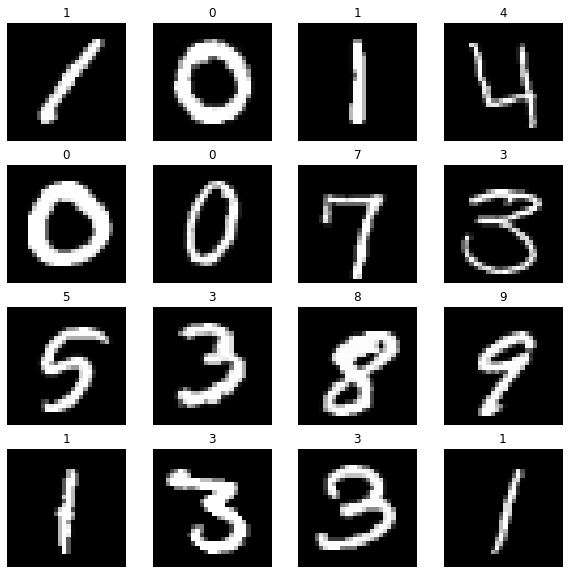

In [26]:
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.title(train_labels[i])
    plt.imshow(train_images[i], 'gray')
    plt.axis('off')
plt.show()

In [96]:
train_x, val_x, train_y, val_y = train_test_split(train_images, train_labels, test_size=0.2)

data_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, shear_range=15, zoom_range=0.1, validation_split=0.25)
train_dataset = data_gen.flow(train_x, train_y, batch_size=256, subset='training')
valid_dataset = data_gen.flow(val_x, val_y, batch_size=64, subset='validation')

In [101]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

In [102]:
model.summary()

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=1e-2),
    metrics=['accuracy']
)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_44 (Conv2D)          (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1568)             

In [103]:
hist = model.fit(train_dataset, validation_data=valid_dataset, epochs=20)

Epoch 1/20
99/99 [==============================] - 7s 64ms/step - loss: 0.6624 - accuracy: 0.7766 - val_loss: 0.1993 - val_accuracy: 0.9376
Epoch 2/20
99/99 [==============================] - 7s 72ms/step - loss: 0.2184 - accuracy: 0.9315 - val_loss: 0.1275 - val_accuracy: 0.9605
Epoch 3/20
99/99 [==============================] - 7s 66ms/step - loss: 0.1688 - accuracy: 0.9471 - val_loss: 0.1337 - val_accuracy: 0.9610
Epoch 4/20
99/99 [==============================] - 6s 62ms/step - loss: 0.1528 - accuracy: 0.9525 - val_loss: 0.1234 - val_accuracy: 0.9619
Epoch 5/20
99/99 [==============================] - 6s 63ms/step - loss: 0.1333 - accuracy: 0.9592 - val_loss: 0.1054 - val_accuracy: 0.9724
Epoch 6/20
99/99 [==============================] - 6s 61ms/step - loss: 0.1357 - accuracy: 0.9589 - val_loss: 0.1049 - val_accuracy: 0.9652
Epoch 7/20
99/99 [==============================] - 6s 61ms/step - loss: 0.1284 - accuracy: 0.9626 - val_loss: 0.0978 - val_accuracy: 0.9638
Epoch 8/20
99

In [108]:
submissions = pd.read_csv('sample_submission.csv')
label = np.argmax(model.predict(test), -1)
submission = pd.DataFrame({'ImageId': range(1, len(label)+1), 'label': label})
submission.to_csv('submission.csv', index=False)